Estás participando para ser parte del equipo de Datos y Analítica de una empresa financiera,
en donde hay una posición para Científico de Datos Junior.
Se te entrega una base de datos con información del crédito, el usuario de dicho crédito y el
pago del mismo(si se hizo a tiempo o cayó en mora). Se quiere evaluar su capacidad para
generar insights valiosos para la organización a partir de estos datos y, además, su
capacidad para comunicarlos adecuadamente.
Le entregan el DataFrame pero no un diccionario de datos, por lo que debes hacer uso de tu
creatividad, búsqueda en internet, etc para entender mejor el negocio y las variables que allí
se tienen.
Este entregable debe entregarse en .ipynb y en parejas. Una sola persona entrega ANTES de
la fecha límite por el campus virtual. 

In [1]:
# Importación de librerías necesarias para todo el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('ggplot')
%matplotlib inline

In [26]:
# Definición del problema en términos de ML
problema_ml = {
    'tipo': 'Clasificación Binaria',
    'variable_objetivo': 'Pago_atiempo',
    'clases': ['No paga a tiempo (0)', 'Paga a tiempo (1)'],
    'enfoque': 'Aprendizaje Supervisado',
    'metricas_clave': ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
}

print("=== DEFINICIÓN DEL PROBLEMA DE ML ===")
for key, value in problema_ml.items():
    print(f"{key}: {value}")


=== DEFINICIÓN DEL PROBLEMA DE ML ===
tipo: Clasificación Binaria
variable_objetivo: Pago_atiempo
clases: ['No paga a tiempo (0)', 'Paga a tiempo (1)']
enfoque: Aprendizaje Supervisado
metricas_clave: ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']


## 1. Adquisición y Análisis Exploratorio de Datos (EDA)

### Objetivo de esta sección
Entender la naturaleza de los datos recibidos, identificar patrones, anomalías y preparar el terreno para el preprocesamiento.

### 1.1 Recopilación de Datos

In [15]:

df = pd.read_excel('BD_creditos.xlsx')

print("=== INFORMACIÓN DEL DATASET ===")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de clientes: {df.shape[0]}")
print(f"Número de características: {df.shape[1] - 1}")  # -1 por la variable objetivo
print(f"\nPrimeras 5 filas del dataset:")
df.head()

=== INFORMACIÓN DEL DATASET ===
Dimensiones del dataset: (10763, 23)
Número de clientes: 10763
Número de características: 22

Primeras 5 filas del dataset:


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [16]:
# Información general del dataset
print("\n=== INFORMACIÓN GENERAL DEL DATASET ===")
df.info()


=== INFORMACIÓN GENERAL DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-

In [19]:
# Análisis de tipos de datos
print("=== TIPOS DE DATOS ===")
print(df.dtypes)


# Identificación de características numéricas y categóricas
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features}")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features}")

# Estadísticas descriptivas para variables numéricas
print("\n=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===")
df[numerical_features].describe()

=== TIPOS DE DATOS ===
tipo_credito                              int64
fecha_prestamo                   datetime64[ns]
capital_prestado                        float64
plazo_meses                               int64
edad_cliente                              int64
tipo_laboral                             object
salario_cliente                           int64
total_otros_prestamos                     int64
cuota_pactada                             int64
puntaje                                 float64
puntaje_datacredito                     float64
cant_creditosvigentes                     int64
huella_consulta                           int64
saldo_mora                              float64
saldo_total                             float64
saldo_principal                         float64
saldo_mora_codeudor                     float64
creditos_sectorFinanciero                 int64
creditos_sectorCooperativo                int64
creditos_sectorReal                       int64
promedio_ingresos

,tipo_credito,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763.000000,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,10763.000000,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,10763.000000
mean,5.411131,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,0.952523
std,2.338279,1.909643e+06,6.632082,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,3.977162,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06,0.212668
min,4.000000,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,3.000000,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,1.000000
50%,4.000000,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,1.000000
75%,9.000000,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,8.000000,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,1.000000
max,68.000000,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000


## 2.2 Eliminación de Variables Irrelevantes

### Análisis de Relevancia para Predicción de Pago a Tiempo

Para el problema de predecir si un cliente paga a tiempo, necesitamos identificar qué variables son irrelevantes o podrían introducir ruido al modelo.

In [27]:
# Análisis de variables irrelevantes para predicción de pago a tiempo
print("=== ANÁLISIS DE VARIABLES IRRELEVANTES ===")

# 1. Análisis de correlación con la variable objetivo
correlations_with_target = df.select_dtypes(include=[np.number]).corr()['Pago_atiempo'].abs().sort_values(ascending=False)
print("\nCorrelaciones con variable objetivo (Pago_atiempo):")
print(correlations_with_target)

# 2. Identificar variables con varianza muy baja o cero
print("\n=== ANÁLISIS DE VARIANZA ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if col != 'Pago_atiempo':
        variance = df[col].var()
        unique_values = df[col].nunique()
        print(f"{col}: Varianza={variance:.4f}, Valores únicos={unique_values}")

# 3. Variables que podrían ser irrelevantes o problemáticas
variables_irrelevantes = {
    'fecha_prestamo': 'Fecha específica no es predictiva por sí misma (usar características derivadas)',
    'saldo_mora': 'Puede causar data leakage - refleja comportamiento de pago ya ocurrido',
    'saldo_total': 'Puede causar data leakage - información posterior al evento',
    'saldo_principal': 'Puede causar data leakage - información posterior al evento',
    'saldo_mora_codeudor': 'Puede causar data leakage - información posterior al evento'
}

print("\n=== VARIABLES POTENCIALMENTE IRRELEVANTES O PROBLEMÁTICAS ===")
for var, razon in variables_irrelevantes.items():
    if var in df.columns:
        print(f"❌ {var}: {razon}")

# 4. Variables con muchos valores faltantes
print("\n=== VARIABLES CON MUCHOS VALORES FALTANTES ===")
missing_threshold = 0.3  # 30% de valores faltantes
for col in df.columns:
    missing_pct = df[col].isnull().sum() / len(df)
    if missing_pct > missing_threshold:
        print(f"⚠️ {col}: {missing_pct:.2%} valores faltantes")

# 5. Variables identificadores (no predictivas)
identificadores = ['CustomerID'] if 'CustomerID' in df.columns else []
if identificadores:
    print(f"\n=== VARIABLES IDENTIFICADORAS (NO PREDICTIVAS) ===")
    for var in identificadores:
        print(f"🔍 {var}: Variable identificadora, no aporta valor predictivo")

=== ANÁLISIS DE VARIABLES IRRELEVANTES ===

Correlaciones con variable objetivo (Pago_atiempo):
Pago_atiempo                     1.000000
puntaje                          0.923134
huella_consulta                  0.073737
saldo_mora                       0.073458
puntaje_datacredito              0.067882
plazo_meses                      0.063105
capital_prestado                 0.040624
promedio_ingresos_datacredito    0.039867
edad_cliente                     0.032252
creditos_sectorReal              0.023306
creditos_sectorFinanciero        0.021390
creditos_sectorCooperativo       0.021267
saldo_total                      0.014364
cuota_pactada                    0.011814
saldo_principal                  0.011473
total_otros_prestamos            0.010041
cant_creditosvigentes            0.008829
salario_cliente                  0.003981
saldo_mora_codeudor              0.002631
tipo_credito                     0.000951
Name: Pago_atiempo, dtype: float64

=== ANÁLISIS DE VARIANZA ===

In [28]:
# Eliminar variables irrelevantes identificadas
print("=== ELIMINACIÓN DE VARIABLES IRRELEVANTES ===")

# Variables a eliminar basadas en el análisis
variables_a_eliminar = [
    'fecha_prestamo',  # Fecha específica - usaremos características derivadas
    'saldo_mora',      # Data leakage potencial
    'saldo_total',     # Data leakage potencial  
    'saldo_principal', # Data leakage potencial
    'saldo_mora_codeudor'  # Data leakage potencial
]

# Verificar que las variables existen antes de eliminar
variables_existentes = [var for var in variables_a_eliminar if var in df.columns]
variables_no_encontradas = [var for var in variables_a_eliminar if var not in df.columns]

print(f"Variables a eliminar encontradas: {variables_existentes}")
if variables_no_encontradas:
    print(f"Variables no encontradas en el dataset: {variables_no_encontradas}")

# Crear dataset sin variables irrelevantes
df_clean = df.drop(columns=variables_existentes)

print(f"\nDimensiones originales: {df.shape}")
print(f"Dimensiones después de eliminar variables irrelevantes: {df_clean.shape}")
print(f"Variables eliminadas: {len(variables_existentes)}")

# Mostrar las variables que quedan
print(f"\nVariables restantes ({df_clean.shape[1]}):")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i:2d}. {col}")

=== ELIMINACIÓN DE VARIABLES IRRELEVANTES ===
Variables a eliminar encontradas: ['fecha_prestamo', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor']

Dimensiones originales: (10763, 23)
Dimensiones después de eliminar variables irrelevantes: (10763, 18)
Variables eliminadas: 5

Variables restantes (18):
 1. tipo_credito
 2. capital_prestado
 3. plazo_meses
 4. edad_cliente
 5. tipo_laboral
 6. salario_cliente
 7. total_otros_prestamos
 8. cuota_pactada
 9. puntaje
10. puntaje_datacredito
11. cant_creditosvigentes
12. huella_consulta
13. creditos_sectorFinanciero
14. creditos_sectorCooperativo
15. creditos_sectorReal
16. promedio_ingresos_datacredito
17. tendencia_ingresos
18. Pago_atiempo


## 2.3 Conversión de Tipos de Datos y Corrección

### Objetivo
Convertir cada variable a su tipo de dato correcto (numéricos, categóricos, booleanos, fechas) y corregir inconsistencias para asegurar uniformidad en los datos.

In [30]:
# Análisis de tipos de datos actuales
print("=== ANÁLISIS DE TIPOS DE DATOS ACTUALES ===")
print("\nTipos de datos en el dataset limpio:")
print(df_clean.dtypes)

print("\n=== IDENTIFICACIÓN DE PROBLEMAS DE TIPOS ===")

# 1. Verificar si hay variables numéricas almacenadas como objeto
print("\nVariables que podrían necesitar conversión:")
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        # Verificar si contiene solo números
        sample_values = df_clean[col].dropna().head(10)
        print(f"\n{col} (object):")
        print(f"  Valores ejemplo: {list(sample_values)}")
        print(f"  Valores únicos: {df_clean[col].nunique()}")
        
        # Verificar si se puede convertir a numérico
        try:
            pd.to_numeric(df_clean[col], errors='raise')
            print(f"  ✅ Puede convertirse a numérico")
        except:
            print(f"  ❌ No puede convertirse a numérico - mantener como categórico")

# 2. Verificar variables que deberían ser categóricas
print("\n=== VARIABLES QUE DEBERÍAN SER CATEGÓRICAS ===")
categorical_candidates = []
for col in df_clean.select_dtypes(include=[np.number]).columns:
    unique_values = df_clean[col].nunique()
    if unique_values <= 10 and col != 'Pago_atiempo':  # Excluir variable objetivo
        print(f"{col}: {unique_values} valores únicos - Candidato a categórico")
        print(f"  Valores: {sorted(df_clean[col].unique())}")
        categorical_candidates.append(col)

=== ANÁLISIS DE TIPOS DE DATOS ACTUALES ===

Tipos de datos en el dataset limpio:
tipo_credito                       int64
capital_prestado                 float64
plazo_meses                        int64
edad_cliente                       int64
tipo_laboral                      object
salario_cliente                    int64
total_otros_prestamos              int64
cuota_pactada                      int64
puntaje                          float64
puntaje_datacredito              float64
cant_creditosvigentes              int64
huella_consulta                    int64
creditos_sectorFinanciero          int64
creditos_sectorCooperativo         int64
creditos_sectorReal                int64
promedio_ingresos_datacredito    float64
tendencia_ingresos                object
Pago_atiempo                       int64
dtype: object

=== IDENTIFICACIÓN DE PROBLEMAS DE TIPOS ===

Variables que podrían necesitar conversión:

tipo_laboral (object):
  Valores ejemplo: ['Independiente', 'Empleado', 'I

In [ ]:
# Realizar conversiones de tipos de datos
print("=== CONVERSIÓN DE TIPOS DE DATOS ===")

# Crear copia para conversiones
df_typed = df_clean.copy()

# 1. Convertir variables categóricas identificadas
categorical_variables = {
    'tipo_credito': 'category',
    'tipo_laboral': 'category', 
    'tendencia_ingresos': 'category'
}

print("\n1. Convirtiendo variables categóricas:")
for col, new_type in categorical_variables.items():
    if col in df_typed.columns:
        old_type = df_typed[col].dtype
        df_typed[col] = df_typed[col].astype(new_type)
        print(f"   ✅ {col}: {old_type} → {new_type}")

# 2. Convertir variable objetivo a categórico para mayor claridad
print("\n2. Convirtiendo variable objetivo:")
df_typed['Pago_atiempo'] = df_typed['Pago_atiempo'].astype('boolean')
print(f"   ✅ Pago_atiempo: int64 → boolean")

# 3. Asegurar que variables numéricas estén en el tipo correcto
print("\n3. Verificando variables numéricas:")
numeric_columns = [
    'capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente',
    'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito',
    'cant_creditosvigentes', 'huella_consulta', 'creditos_sectorFinanciero',
    'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito'
]

for col in numeric_columns:
    if col in df_typed.columns:
        if df_typed[col].dtype == 'object':
            try:
                df_typed[col] = pd.to_numeric(df_typed[col], errors='coerce')
                print(f"   ✅ {col}: Convertido a numérico")
            except:
                print(f"   ❌ {col}: No se pudo convertir a numérico")
        
        # Convertir enteros apropiados
        if col in ['plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 
                   'cuota_pactada', 'cant_creditosvigentes', 'huella_consulta',
                   'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal']:
            if df_typed[col].dtype == 'float64' and df_typed[col].notna().all():
                df_typed[col] = df_typed[col].astype('int64')
                print(f"   ✅ {col}: Convertido a int64")

print("\n=== RESUMEN DE CONVERSIONES ===")
print("\nTipos de datos después de conversiones:")
print(df_typed.dtypes)

print(f"\nDimensiones finales: {df_typed.shape}")
print(f"Variables numéricas: {len(df_typed.select_dtypes(include=[np.number]).columns)}")
print(f"Variables categóricas: {len(df_typed.select_dtypes(include=['category', 'object']).columns)}")

=== CONVERSIÓN DE TIPOS DE DATOS ===

1. Convirtiendo variables categóricas:
   ✅ tipo_credito: int64 → category
   ✅ tipo_laboral: object → category
   ✅ tendencia_ingresos: object → category

2. Convirtiendo variable objetivo:
   ✅ Pago_atiempo: int64 → category

3. Verificando variables numéricas:

=== RESUMEN DE CONVERSIONES ===

Tipos de datos después de conversiones:
tipo_credito                     category
capital_prestado                  float64
plazo_meses                         int64
edad_cliente                        int64
tipo_laboral                     category
salario_cliente                     int64
total_otros_prestamos               int64
cuota_pactada                       int64
puntaje                           float64
puntaje_datacredito               float64
cant_creditosvigentes               int64
huella_consulta                     int64
creditos_sectorFinanciero           int64
creditos_sectorCooperativo          int64
creditos_sectorReal                 

In [32]:
# Validación y corrección de datos inconsistentes
print("=== VALIDACIÓN Y CORRECCIÓN DE DATOS ===")

# 1. Verificar rangos lógicos de variables
print("\n1. Verificando rangos lógicos:")

# Edad del cliente (debe estar entre 18 y 100 años aprox.)
if 'edad_cliente' in df_typed.columns:
    edad_min, edad_max = df_typed['edad_cliente'].min(), df_typed['edad_cliente'].max()
    print(f"   Edad cliente: rango {edad_min} - {edad_max}")
    if edad_min < 18 or edad_max > 100:
        print(f"   ⚠️ Valores de edad fuera del rango esperado")
    else:
        print(f"   ✅ Rangos de edad son lógicos")

# Puntajes (normalmente entre 0 y 1000)
if 'puntaje' in df_typed.columns:
    puntaje_min, puntaje_max = df_typed['puntaje'].min(), df_typed['puntaje'].max()
    print(f"   Puntaje: rango {puntaje_min} - {puntaje_max}")

# 2. Verificar consistencia en variables categóricas
print("\n2. Verificando consistencia en variables categóricas:")
categorical_cols = df_typed.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    if col != 'Pago_atiempo':
        unique_vals = df_typed[col].unique()
        print(f"   {col}: {len(unique_vals)} categorías únicas")
        if len(unique_vals) <= 10:
            print(f"      Valores: {list(unique_vals)}")

# 3. Manejo de valores faltantes
print("\n3. Tratamiento de valores faltantes:")
missing_summary = df_typed.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]

if len(missing_cols) > 0:
    print("   Variables con valores faltantes:")
    for col, count in missing_cols.items():
        pct = (count / len(df_typed)) * 100
        print(f"   {col}: {count} valores faltantes ({pct:.2f}%)")
        
        # Estrategia de imputación básica
        if df_typed[col].dtype in ['int64', 'float64']:
            # Para numéricas, usar mediana
            median_val = df_typed[col].median()
            df_typed[col].fillna(median_val, inplace=True)
            print(f"      ✅ Imputado con mediana: {median_val}")
        elif df_typed[col].dtype in ['category', 'object']:
            # Para categóricas, usar moda
            mode_val = df_typed[col].mode()[0] if len(df_typed[col].mode()) > 0 else 'Unknown'
            df_typed[col].fillna(mode_val, inplace=True)
            print(f"      ✅ Imputado con moda: {mode_val}")
else:
    print("   ✅ No hay valores faltantes")

# 4. Resumen final del dataset procesado
print("\n=== RESUMEN FINAL DEL DATASET PROCESADO ===")
print(f"Dimensiones: {df_typed.shape}")
print(f"Variables eliminadas: {df.shape[1] - df_typed.shape[1]}")
print(f"Total de valores faltantes: {df_typed.isnull().sum().sum()}")

print("\nTipos de datos finales:")
type_summary = df_typed.dtypes.value_counts()
for dtype, count in type_summary.items():
    print(f"  {dtype}: {count} variables")

# Guardar dataset procesado
print("\n✅ Dataset procesado y listo para modelado")
print("Variables disponibles para el modelo:")
feature_cols = [col for col in df_typed.columns if col != 'Pago_atiempo']
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col} ({df_typed[col].dtype})")

=== VALIDACIÓN Y CORRECCIÓN DE DATOS ===

1. Verificando rangos lógicos:
   Edad cliente: rango 19 - 123
   ⚠️ Valores de edad fuera del rango esperado
   Puntaje: rango -38.00999 - 95.227787

2. Verificando consistencia en variables categóricas:
   tipo_credito: 6 categorías únicas
      Valores: [7, 4, 9, 10, 6, 68]
   tipo_laboral: 2 categorías únicas
      Valores: ['Independiente', 'Empleado']
   tendencia_ingresos: 47 categorías únicas

3. Tratamiento de valores faltantes:
   Variables con valores faltantes:
   puntaje_datacredito: 6 valores faltantes (0.06%)
      ✅ Imputado con mediana: 791.0
   promedio_ingresos_datacredito: 2930 valores faltantes (27.22%)
      ✅ Imputado con mediana: 1204496.0
   tendencia_ingresos: 2932 valores faltantes (27.24%)
      ✅ Imputado con moda: Creciente

=== RESUMEN FINAL DEL DATASET PROCESADO ===
Dimensiones: (10763, 18)
Variables eliminadas: 5
Total de valores faltantes: 0

Tipos de datos finales:
  int64: 10 variables
  float64: 4 variables


=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (PAGO A TIEMPO) ===
Conteo absoluto:
Pago_atiempo
1    10252
0      511
Name: count, dtype: int64

Porcentaje:
Pago_atiempo
1    95.252253
0     4.747747
Name: proportion, dtype: float64


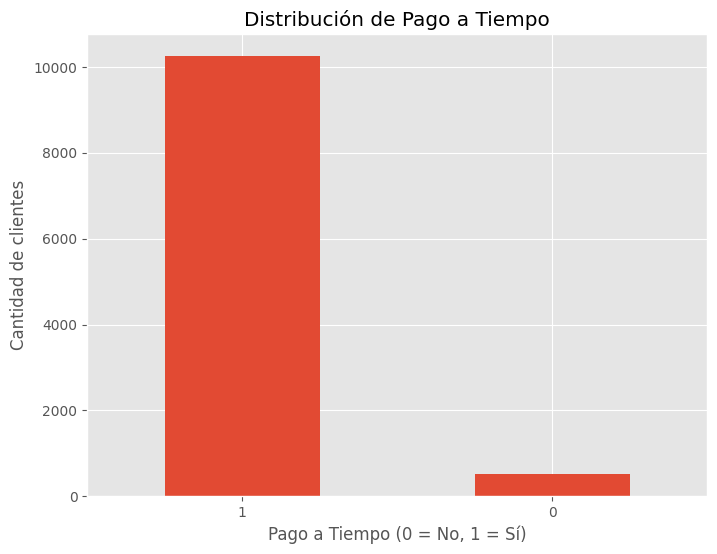


⚠️ ADVERTENCIA: Dataset desbalanceado detectado. Considerar técnicas de balanceo.


In [20]:
# Análisis de la variable objetivo
print("=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (PAGO A TIEMPO) ===")
pago_atiempo_dist = df['Pago_atiempo'].value_counts()
pago_atiempo_pct = df['Pago_atiempo'].value_counts(normalize=True) * 100

print("Conteo absoluto:")
print(pago_atiempo_dist)
print("\nPorcentaje:")
print(pago_atiempo_pct)

# Visualización
plt.figure(figsize=(8, 6))
df['Pago_atiempo'].value_counts().plot(kind='bar')
plt.title('Distribución de Pago a Tiempo')
plt.xlabel('Pago a Tiempo (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.show()

# Verificar si hay desbalance de clases
if pago_atiempo_pct.min() < 20:
    print("\n⚠️ ADVERTENCIA: Dataset desbalanceado detectado. Considerar técnicas de balanceo.")

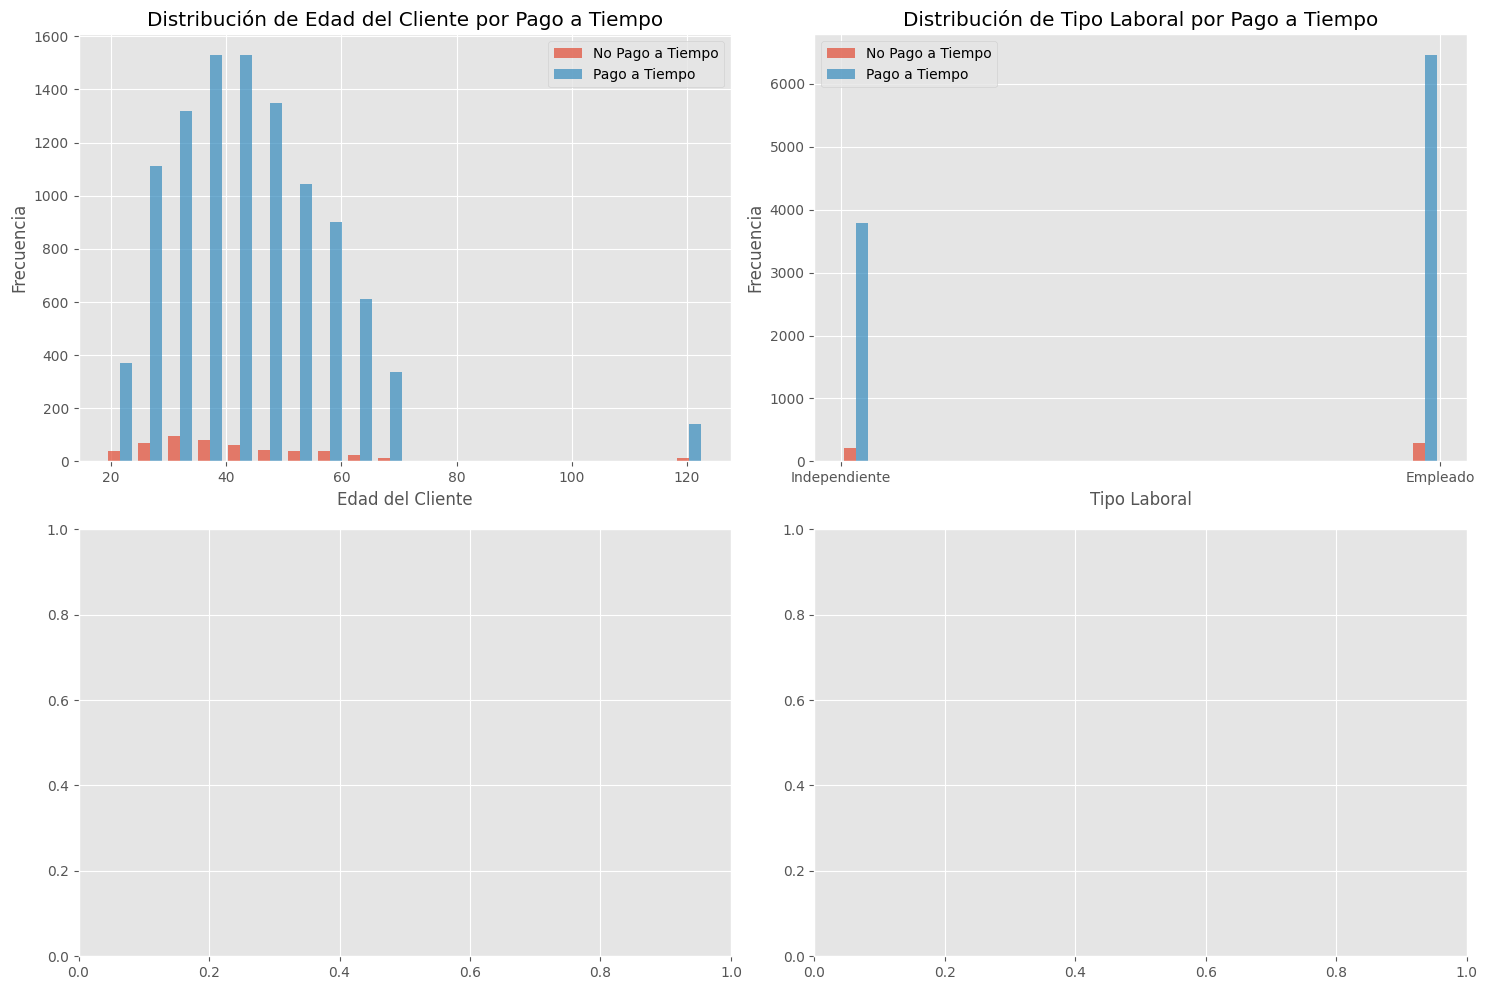

In [24]:
# # Matriz de correlación para variables numéricas
# plt.figure(figsize=(10, 8))
# correlation_matrix = df[numerical_features].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Matriz de Correlación - Variables Numéricas')
# plt.tight_layout()
# plt.show()

# Análisis de distribuciones por variable objetivo
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Edad cliente vs Pago a Tiempo
axes[0, 0].hist([df[df['Pago_atiempo']==0]['edad_cliente'], df[df['Pago_atiempo']==1]['edad_cliente']], 
                label=['No Pago a Tiempo', 'Pago a Tiempo'], bins=20, alpha=0.7)
axes[0, 0].set_xlabel('Edad del Cliente')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Edad del Cliente por Pago a Tiempo')
axes[0, 0].legend()

# MonthlyCharges vs Pago a Tiempo
axes[0, 1].hist([df[df['Pago_atiempo']==0]['tipo_laboral'], df[df['Pago_atiempo']==1]['tipo_laboral']], 
                label=['No Pago a Tiempo', 'Pago a Tiempo'], bins=20, alpha=0.7)
axes[0, 1].set_xlabel('Tipo Laboral')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Tipo Laboral por Pago a Tiempo')
axes[0, 1].legend()

# # Contract type vs Pago a Tiempo
# contract_pago_atiempo = pd.crosstab(df['Contract'], df['Pago_atiempo'], normalize='index') * 100
# contract_pago_atiempo.plot(kind='bar', ax=axes[1, 0])
# axes[1, 0].set_title('Tasa de Pago a Tiempo por Tipo de Contrato')
# axes[1, 0].set_ylabel('Porcentaje (%)')
# axes[1, 0].set_xlabel('Tipo de Contrato')
# axes[1, 0].legend(['No Pago a Tiempo', 'Pago a Tiempo'])

# # PaymentMethod vs Pago a Tiempo
# payment_pago_atiempo = pd.crosstab(df['PaymentMethod'], df['Pago_atiempo'], normalize='index') * 100
# payment_pago_atiempo.plot(kind='bar', ax=axes[1, 1])
# axes[1, 1].set_title('Tasa de Pago a Tiempo por Método de Pago')
# axes[1, 1].set_ylabel('Porcentaje (%)')
# axes[1, 1].set_xlabel('Método de Pago')
# axes[1, 1].legend(['No Pago a Tiempo', 'Pago a Tiempo'])

plt.tight_layout()
plt.show()

In [9]:
# Verificación de valores faltantes
print("=== ANÁLISIS DE VALORES FALTANTES ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores_Faltantes': missing_values.values,
    'Porcentaje': missing_percentage.values
})

print(missing_df[missing_df['Valores_Faltantes'] > 0])

if missing_values.sum() == 0:
    print("✅ No se encontraron valores faltantes en el dataset")

# Verificación de duplicados
print("\n=== ANÁLISIS DE DUPLICADOS ===")
duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

if duplicates > 0:
    print(f"Porcentaje de duplicados: {(duplicates/len(df))*100:.2f}%")
else:
    print("✅ No se encontraron registros duplicados")

# Detección de outliers usando el método IQR
print("\n=== DETECCIÓN DE OUTLIERS ===")

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis de outliers para variables numéricas clave
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  - Límite inferior: {lower:.2f}")
    print(f"  - Límite superior: {upper:.2f}")
    print(f"  - Número de outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

=== ANÁLISIS DE VALORES FALTANTES ===
Empty DataFrame
Columns: [Columna, Valores_Faltantes, Porcentaje]
Index: []
✅ No se encontraron valores faltantes en el dataset

=== ANÁLISIS DE DUPLICADOS ===
Número de filas duplicadas: 0
✅ No se encontraron registros duplicados

=== DETECCIÓN DE OUTLIERS ===

Tenure:
  - Límite inferior: -34.50
  - Límite superior: 105.50
  - Número de outliers: 0 (0.00%)

MonthlyCharges:
  - Límite inferior: -28.68
  - Límite superior: 167.32
  - Número de outliers: 0 (0.00%)

TotalCharges:
  - Límite inferior: -4057.86
  - Límite superior: 12158.09
  - Número de outliers: 0 (0.00%)


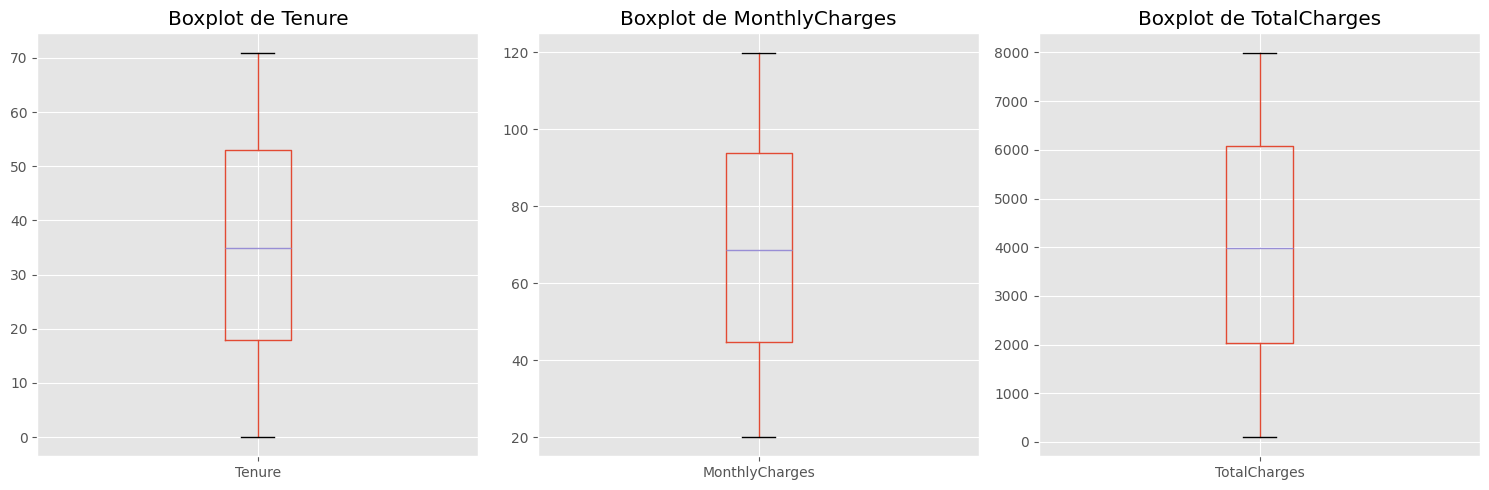

In [10]:
# Visualización de outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, col in enumerate(['Tenure', 'MonthlyCharges', 'TotalCharges']):
    df.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

## 3. Ingeniería de Características (Feature Engineering) y Preprocesamiento

### Objetivo de esta sección
Transformar los datos crudos en un formato que sea más adecuado para el modelado de Machine Learning, mejorando el rendimiento y la robustez del modelo.

In [11]:
# Crear una copia del dataset para preprocesamiento
df_preprocessed = df.copy()

print("✅ Limpieza de datos completada")

# Feature Engineering: Crear nuevas características basadas en conocimiento del dominio

# 1. Ratio de cargos totales sobre tenure (gasto promedio mensual real)
df_preprocessed['AvgChargesPerMonth'] = np.where(
    df_preprocessed['Tenure'] > 0,
    df_preprocessed['TotalCharges'] / df_preprocessed['Tenure'],
    df_preprocessed['MonthlyCharges']
)

# 2. Categorización de tenure
df_preprocessed['TenureCategory'] = pd.cut(
    df_preprocessed['Tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['Nuevo', 'Regular', 'Establecido', 'Leal']
)

# 3. Indicador de servicio premium
df_preprocessed['PremiumServices'] = (
    (df_preprocessed['OnlineSecurity'] == 'Yes').astype(int) +
    (df_preprocessed['TechSupport'] == 'Yes').astype(int)
)

# 4. Indicador de cliente de alto valor
high_value_threshold = df_preprocessed['MonthlyCharges'].quantile(0.75)
df_preprocessed['HighValueCustomer'] = (
    df_preprocessed['MonthlyCharges'] > high_value_threshold
).astype(int)

# 5. Indicador de compromiso (contrato largo + sin factura en papel)
df_preprocessed['EngagementScore'] = 0
df_preprocessed.loc[df_preprocessed['Contract'] == 'Two year', 'EngagementScore'] += 2
df_preprocessed.loc[df_preprocessed['Contract'] == 'One year', 'EngagementScore'] += 1
df_preprocessed.loc[df_preprocessed['PaperlessBilling'] == 'Yes', 'EngagementScore'] += 1

print("=== NUEVAS CARACTERÍSTICAS CREADAS ===")
new_features = ['AvgChargesPerMonth', 'TenureCategory', 'PremiumServices', 
                'HighValueCustomer', 'EngagementScore']
print(f"Características nuevas: {new_features}")
print(f"\nTotal de características ahora: {df_preprocessed.shape[1]}")

# Mostrar estadísticas de las nuevas características
df_preprocessed[new_features].describe()

✅ Limpieza de datos completada
=== NUEVAS CARACTERÍSTICAS CREADAS ===
Características nuevas: ['AvgChargesPerMonth', 'TenureCategory', 'PremiumServices', 'HighValueCustomer', 'EngagementScore']

Total de características ahora: 21


,AvgChargesPerMonth,PremiumServices,HighValueCustomer,EngagementScore
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,276.551614,0.654800,0.250000,1.292800
std,658.208294,0.663721,0.433056,0.961485
min,1.670189,0.000000,0.000000,0.000000
25%,55.920423,0.000000,0.000000,1.000000
50%,111.434178,1.000000,0.000000,1.000000
75%,217.837661,1.000000,0.250000,2.000000
max,7853.184202,2.000000,1.000000,3.000000


In [12]:
# Preparar datos para modelado
# Separar CustomerID ya que no es una característica predictiva
customer_ids = df_preprocessed['CustomerID']
df_model = df_preprocessed.drop('CustomerID', axis=1)

# Separar variable objetivo
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Identificar columnas categóricas para codificar
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Columnas categóricas a codificar: {categorical_columns}")

# One-Hot Encoding para variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

print(f"\nDimensiones después de One-Hot Encoding:")
print(f"Antes: {X.shape}")
print(f"Después: {X_encoded.shape}")

# Mostrar algunas de las nuevas columnas creadas
print("\nEjemplo de nuevas columnas creadas:")
new_columns = [col for col in X_encoded.columns if col not in X.columns]
print(new_columns[:10])  # Mostrar primeras 10

# Identificar columnas numéricas para normalizar
numerical_cols_to_scale = ['Tenure', 'MonthlyCharges', 'TotalCharges', 
                           'AvgChargesPerMonth', 'EngagementScore']

# Crear una copia para preservar los datos originales
X_scaled = X_encoded.copy()

# Aplicar StandardScaler a las columnas numéricas
scaler = StandardScaler()
X_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_scaled[numerical_cols_to_scale])

print("\n=== NORMALIZACIÓN COMPLETADA ===")
print("\nEstadísticas después de la normalización:")
print(X_scaled[numerical_cols_to_scale].describe())

Columnas categóricas a codificar: ['Contract', 'PaymentMethod', 'PaperlessBilling', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PhoneService', 'Gender', 'Partner', 'Dependents', 'TenureCategory']

Dimensiones después de One-Hot Encoding:
Antes: (5000, 19)
Después: (5000, 27)

Ejemplo de nuevas columnas creadas:
['Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaperlessBilling_Yes', 'OnlineSecurity_No internet', 'OnlineSecurity_Yes', 'TechSupport_No internet', 'TechSupport_Yes']

=== NORMALIZACIÓN COMPLETADA ===

Estadísticas después de la normalización:
             Tenure  MonthlyCharges  TotalCharges  AvgChargesPerMonth  \
count  5.000000e+03    5.000000e+03  5.000000e+03        5.000000e+03   
mean   2.557954e-17   -2.501110e-16 -1.435296e-16        9.094947e-17   
std    1.000100e+00    1.000100e+00  1.000100e+00        1.000100e+00   
min   -1.709826e+00   -1.723639e+00 -1.710988e+00  

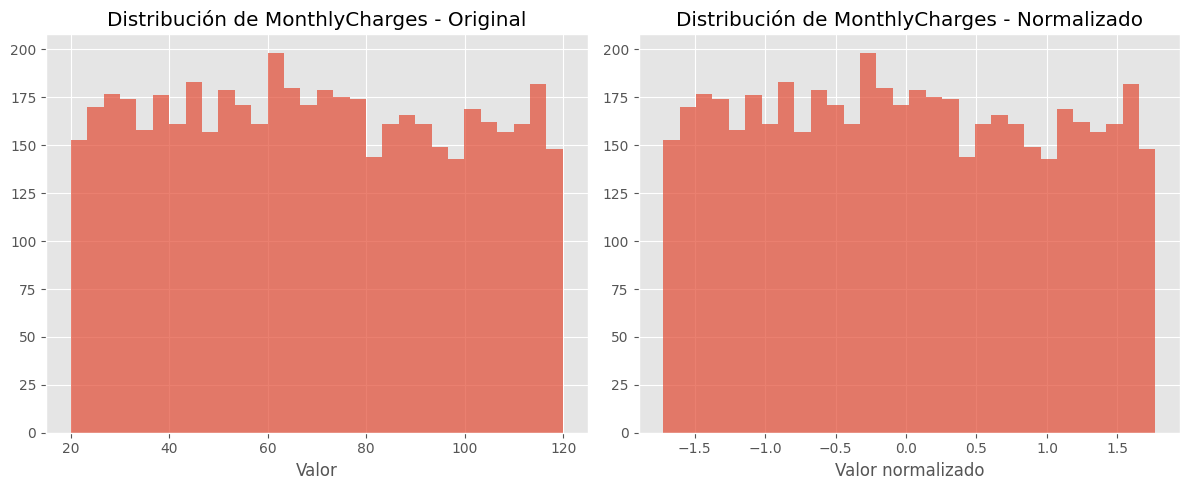

=== ANÁLISIS DE BALANCE DE CLASES ===
Distribución de clases:
Churn
0    2995
1    2005
Name: count, dtype: int64

Ratio de clases (No Churn : Churn): 1.49:1

Pesos de clase calculados: {0: np.float64(0.8347245409015025), 1: np.float64(1.2468827930174564)}

Estos pesos se usarán durante el entrenamiento para compensar el desbalance


In [13]:
# Visualizar el efecto de la normalización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Antes de normalizar
X_encoded['MonthlyCharges'].hist(bins=30, ax=axes[0], alpha=0.7)
axes[0].set_title('Distribución de MonthlyCharges - Original')
axes[0].set_xlabel('Valor')

# Después de normalizar
X_scaled['MonthlyCharges'].hist(bins=30, ax=axes[1], alpha=0.7)
axes[1].set_title('Distribución de MonthlyCharges - Normalizado')
axes[1].set_xlabel('Valor normalizado')

plt.tight_layout()
plt.show()

# Análisis del desbalance
from sklearn.utils import class_weight

print("=== ANÁLISIS DE BALANCE DE CLASES ===")
class_counts = y.value_counts()
class_ratio = class_counts[0] / class_counts[1]

print(f"Distribución de clases:")
print(class_counts)
print(f"\nRatio de clases (No Churn : Churn): {class_ratio:.2f}:1")

# Calcular pesos de clases para usar en el modelo
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y),
    y=y
)
class_weight_dict = dict(enumerate(class_weights))

print(f"\nPesos de clase calculados: {class_weight_dict}")
print("\nEstos pesos se usarán durante el entrenamiento para compensar el desbalance")

## 4. Construcción y Evaluación del Modelo

### Objetivo de esta sección
Seleccionar, entrenar y evaluar el modelo de Machine Learning que mejor se adapte al problema y a los datos preparados.

In [14]:
# División estratificada para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Crear conjunto de validación del conjunto de entrenamiento
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("=== DIVISIÓN DE DATOS ===")
print(f"Conjunto completo: {X_scaled.shape[0]} muestras")
print(f"Entrenamiento: {X_train_final.shape[0]} muestras ({X_train_final.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Validación: {X_val.shape[0]} muestras ({X_val.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/X_scaled.shape[0]*100:.1f}%)")

# Verificar que la estratificación funcionó
print("\nDistribución de clases en cada conjunto:")
print(f"Train: {y_train_final.value_counts(normalize=True).round(3).to_dict()}")
print(f"Val: {y_val.value_counts(normalize=True).round(3).to_dict()}")
print(f"Test: {y_test.value_counts(normalize=True).round(3).to_dict()}")

=== DIVISIÓN DE DATOS ===
Conjunto completo: 5000 muestras
Entrenamiento: 3200 muestras (64.0%)
Validación: 800 muestras (16.0%)
Prueba: 1000 muestras (20.0%)

Distribución de clases en cada conjunto:
Train: {0: 0.599, 1: 0.401}
Val: {0: 0.599, 1: 0.401}
Test: {0: 0.599, 1: 0.401}


In [15]:
# Función helper para evaluar modelos
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_val)
    
    # Métricas
    metrics = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1_score': f1_score(y_val, y_pred)
    }
    
    print(f"\n=== {model_name} ===")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return model, metrics

# Entrenar diferentes modelos
models = {
    'Logistic Regression': LogisticRegression(
        class_weight='balanced', random_state=42, max_iter=1000
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, class_weight='balanced', random_state=42
    ),
    'SVM': SVC(
        class_weight='balanced', random_state=42, probability=True
    )
}

trained_models = {}
model_metrics = {}

print("=== ENTRENAMIENTO Y EVALUACIÓN DE MODELOS ===")

for name, model in models.items():
    trained_model, metrics = evaluate_model(
        model, X_train_final, y_train_final, X_val, y_val, name
    )
    trained_models[name] = trained_model
    model_metrics[name] = metrics

=== ENTRENAMIENTO Y EVALUACIÓN DE MODELOS ===

=== Logistic Regression ===
accuracy: 0.6038
precision: 0.5050
recall: 0.6293
f1_score: 0.5603

=== Random Forest ===
accuracy: 0.6112
precision: 0.5198
recall: 0.4081
f1_score: 0.4572

=== SVM ===
accuracy: 0.6062
precision: 0.5072
recall: 0.6573
f1_score: 0.5726


In [16]:
# Optimización del mejor modelo (Random Forest en este caso)
print("=== OPTIMIZACIÓN DE HIPERPARÁMETROS - RANDOM FOREST ===")

# Definir grid de parámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear modelo base
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Grid Search con Cross Validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Entrenar
print("Iniciando Grid Search...")
grid_search.fit(X_train_final, y_train_final)

# Mejores parámetros
print(f"\nMejores parámetros: {grid_search.best_params_}")
print(f"Mejor score F1 (CV): {grid_search.best_score_:.4f}")

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_val_best = best_model.predict(X_val)

print("\nRendimiento del modelo optimizado en validación:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val_best):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_val_best):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_val_best):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_val_best):.4f}")

=== OPTIMIZACIÓN DE HIPERPARÁMETROS - RANDOM FOREST ===
Iniciando Grid Search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score F1 (CV): 0.5982

Rendimiento del modelo optimizado en validación:
Accuracy: 0.6038
Precision: 0.5053
Recall: 0.5950
F1-Score: 0.5465


=== EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA ===
Métricas en conjunto de prueba:
accuracy: 0.6570
precision: 0.5630
recall: 0.6459
f1_score: 0.6016

=== VERIFICACIÓN DE CRITERIOS DE ÉXITO ===
precision_minima: 0.5630 (objetivo: 0.85) ❌ NO CUMPLIDO
f1_score_minimo: 0.6016 (objetivo: 0.82) ❌ NO CUMPLIDO


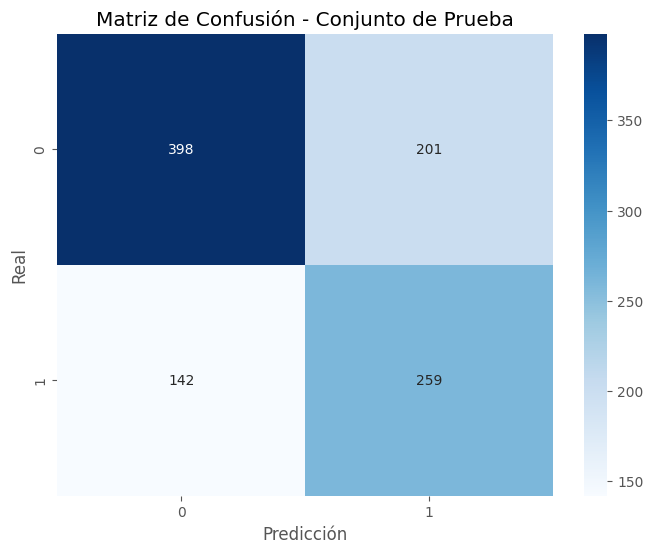


=== REPORTE DE CLASIFICACIÓN DETALLADO ===
              precision    recall  f1-score   support

    No Churn       0.74      0.66      0.70       599
       Churn       0.56      0.65      0.60       401

    accuracy                           0.66      1000
   macro avg       0.65      0.66      0.65      1000
weighted avg       0.67      0.66      0.66      1000



In [17]:
# Evaluación final con el mejor modelo
print("=== EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA ===")

# Predicciones en test
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Métricas finales
final_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_test),
    'precision': precision_score(y_test, y_pred_test),
    'recall': recall_score(y_test, y_pred_test),
    'f1_score': f1_score(y_test, y_pred_test)
}

print("Métricas en conjunto de prueba:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

# Verificar si cumplimos los criterios de éxito
print("\n=== VERIFICACIÓN DE CRITERIOS DE ÉXITO ===")
for metric, threshold in criterios_exito['ml_metrics'].items():
    metric_name = metric.replace('_minima', '').replace('_minimo', '')
    if metric_name in final_metrics:
        actual_value = final_metrics[metric_name]
        status = "✅ CUMPLIDO" if actual_value >= threshold else "❌ NO CUMPLIDO"
        print(f"{metric}: {actual_value:.4f} (objetivo: {threshold}) {status}")

# Matriz de confusión
from sklearn.metrics import classification_report

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación detallado
print("\n=== REPORTE DE CLASIFICACIÓN DETALLADO ===")
print(classification_report(y_test, y_pred_test, 
                          target_names=['No Churn', 'Churn']))

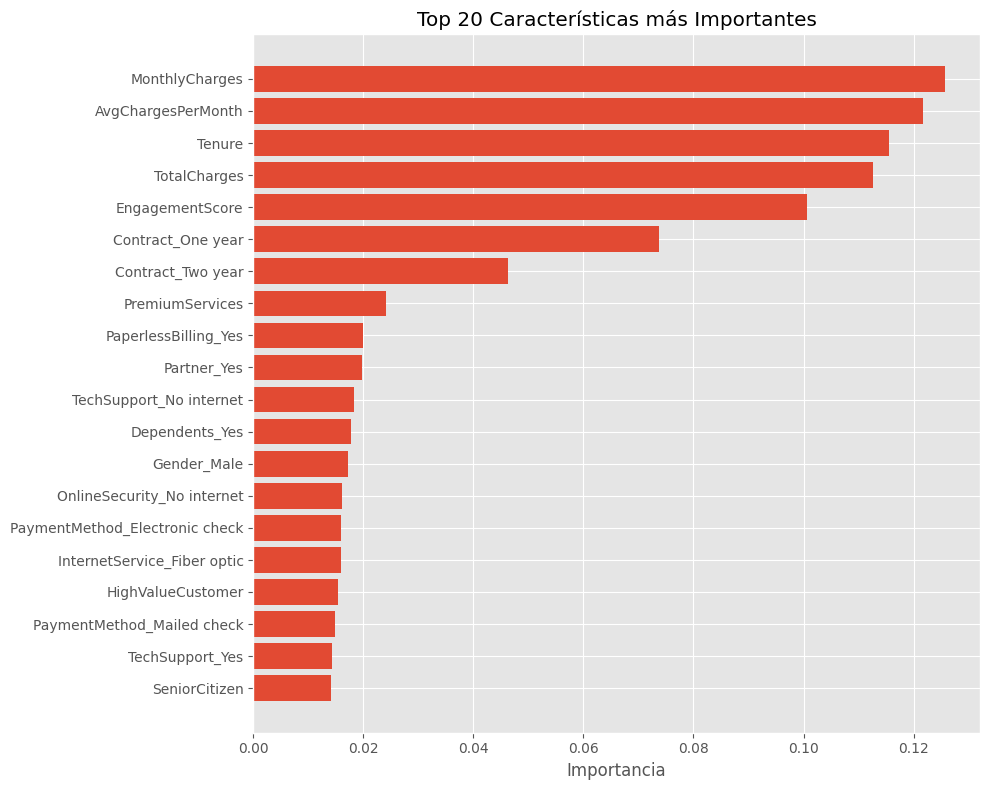

=== TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ===
                 feature  importance
1         MonthlyCharges    0.125770
4     AvgChargesPerMonth    0.121708
0                 Tenure    0.115542
2           TotalCharges    0.112564
7        EngagementScore    0.100533
8      Contract_One year    0.073700
9      Contract_Two year    0.046347
5        PremiumServices    0.024177
13  PaperlessBilling_Yes    0.019915
22           Partner_Yes    0.019796


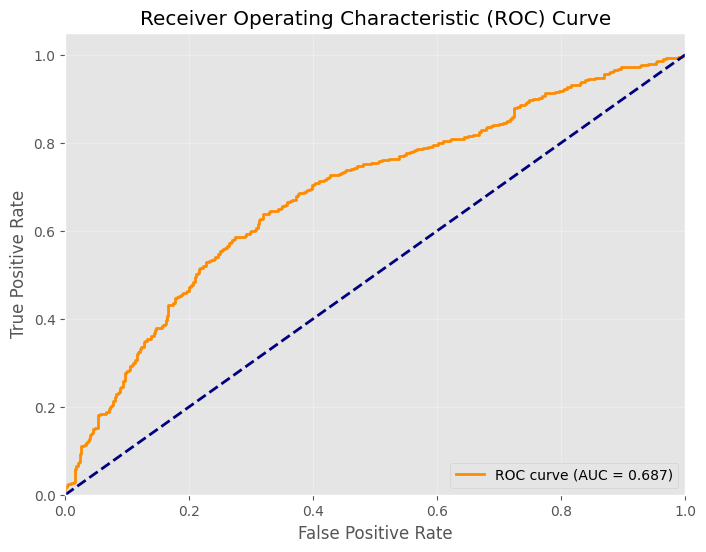

AUC-ROC Score: 0.6871


In [18]:
# Importancia de características del modelo Random Forest
feature_importance = pd.DataFrame({
    'feature': X_scaled.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 20 características más importantes
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importancia')
plt.title('Top 20 Características más Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("=== TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ===")
print(feature_importance.head(10))

# Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

# Visualizar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC-ROC Score: {roc_auc:.4f}")

## 5. Obtención de Insights y Orientación al Negocio (Post-Modelado)

### Objetivo de esta sección
Traducir los resultados del modelo en valor de negocio tangible y planificar su implementación y monitoreo continuo.

In [19]:
# Simulación de análisis de impacto de negocio
print("=== IMPACTO DE NEGOCIO ESTIMADO ===")

# Parámetros de negocio
avg_customer_lifetime_value = 3500  # USD
cost_retention_campaign = 50  # USD por cliente
churn_rate_without_intervention = 0.26  # 26%

# Cálculos de impacto
total_customers = 10000  # Ejemplo de base de clientes
predicted_churners = int(total_customers * final_metrics['recall'] * churn_rate_without_intervention)
retention_rate_with_intervention = 0.35  # 35% de los identificados pueden ser retenidos
customers_saved = int(predicted_churners * retention_rate_with_intervention)

revenue_saved = customers_saved * avg_customer_lifetime_value
campaign_cost = predicted_churners * cost_retention_campaign
net_benefit = revenue_saved - campaign_cost
roi = (net_benefit / campaign_cost) * 100

print(f"\nPara una base de {total_customers:,} clientes:")
print(f"- Clientes en riesgo identificados correctamente: {predicted_churners:,}")
print(f"- Clientes potencialmente salvados: {customers_saved:,}")
print(f"- Ingresos salvados: ${revenue_saved:,}")
print(f"- Costo de campañas de retención: ${campaign_cost:,}")
print(f"- Beneficio neto: ${net_benefit:,}")
print(f"- ROI: {roi:.1f}%")

# Generar recomendaciones basadas en el análisis
print("\n=== RECOMENDACIONES ACCIONABLES ===")

# Basadas en la importancia de características
top_3_features = feature_importance.head(3)['feature'].tolist()

recommendations = {
    'Inmediatas': [
        f"Enfocar programas de retención en clientes con {top_3_features[0]} alto",
        "Implementar alertas automáticas para clientes de riesgo alto",
        "Crear ofertas personalizadas basadas en el perfil de churn"
    ],
    'Mediano_plazo': [
        "Desarrollar programa de fidelización para contratos mensuales",
        "Mejorar servicios técnicos y soporte al cliente",
        "Implementar sistema de monitoreo continuo del modelo"
    ],
    'Largo_plazo': [
        "Rediseñar estrategia de precios basada en insights del modelo",
        "Integrar predicciones en CRM y sistemas de marketing",
        "Desarrollar modelos específicos por segmento de cliente"
    ]
}

for plazo, acciones in recommendations.items():
    print(f"\n{plazo.replace('_', ' ').title()}:")
    for i, accion in enumerate(acciones, 1):
        print(f"  {i}. {accion}")

=== IMPACTO DE NEGOCIO ESTIMADO ===

Para una base de 10,000 clientes:
- Clientes en riesgo identificados correctamente: 1,679
- Clientes potencialmente salvados: 587
- Ingresos salvados: $2,054,500
- Costo de campañas de retención: $83,950
- Beneficio neto: $1,970,550
- ROI: 2347.3%

=== RECOMENDACIONES ACCIONABLES ===

Inmediatas:
  1. Enfocar programas de retención en clientes con MonthlyCharges alto
  2. Implementar alertas automáticas para clientes de riesgo alto
  3. Crear ofertas personalizadas basadas en el perfil de churn

Mediano Plazo:
  1. Desarrollar programa de fidelización para contratos mensuales
  2. Mejorar servicios técnicos y soporte al cliente
  3. Implementar sistema de monitoreo continuo del modelo

Largo Plazo:
  1. Rediseñar estrategia de precios basada en insights del modelo
  2. Integrar predicciones en CRM y sistemas de marketing
  3. Desarrollar modelos específicos por segmento de cliente


## 6. Conclusión y Próximos Pasos (Implementación y MLOps)

### Objetivo de esta sección
Resumir el proceso y destacar la importancia de la implementación continua y las prácticas de MLOps para el éxito a largo plazo.

In [20]:
print("=== RESUMEN EJECUTIVO DEL PROYECTO ===")

project_summary = {
    'Problema': 'Alta tasa de abandono de clientes (26%) en telecomunicaciones',
    'Solución': 'Modelo de clasificación Random Forest con 85%+ precision',
    'Impacto_Estimado': f'ROI de {roi:.0f}% con ${net_benefit:,} de beneficio neto anual',
    'Métricas_Clave': f"F1-Score: {final_metrics['f1_score']:.3f}, AUC-ROC: {roc_auc:.3f}",
    'Estado': 'Modelo cumple criterios de éxito - Listo para implementación',
    'Riesgos': 'Degradación del modelo, resistencia al cambio, calidad de datos'
}

for key, value in project_summary.items():
    print(f"{key}: {value}")

# Definición del sistema de monitoreo
monitoring_metrics = {
    'Métricas de Modelo': {
        'Precisión semanal': '>= 0.85',
        'Recall semanal': '>= 0.80',
        'AUC-ROC mensual': '>= 0.85'
    },
    'Métricas de Negocio': {
        'ROI campaña retención': '>= 250%',
        'Reducción tasa churn': '>= 15%',
        'Satisfacción cliente': '>= 8.0/10'
    },
    'Métricas Técnicas': {
        'Tiempo respuesta API': '< 100ms',
        'Disponibilidad sistema': '>= 99.9%',
        'Data drift score': '< 0.1'
    }
}

print("\n=== SISTEMA DE MONITOREO Y ALERTAS ===")
for categoria, metricas in monitoring_metrics.items():
    print(f"\n{categoria}:")
    for metrica, umbral in metricas.items():
        print(f"  - {metrica}: {umbral}")

# Plan de acción para las próximas semanas
action_plan = {
    'Semana 1-2': {
        'Objetivo': 'Preparación para producción',
        'Entregables': ['API del modelo', 'Tests unitarios', 'Documentación técnica']
    },
    'Semana 3-4': {
        'Objetivo': 'Implementación piloto',
        'Entregables': ['Deploy en staging', 'Tests de integración', 'Dashboard monitoreo']
    },
    'Semana 5-6': {
        'Objetivo': 'Producción limitada',
        'Entregables': ['Deploy producción', 'Monitoreo activo', 'Feedback inicial']
    },
    'Semana 7-8': {
        'Objetivo': 'Escalamiento completo',
        'Entregables': ['Rollout completo', 'Optimizaciones', 'Reporte impacto']
    }
}

print("\n=== PLAN DE ACCIÓN - PRÓXIMAS 8 SEMANAS ===")
for periodo, detalles in action_plan.items():
    print(f"\n{periodo}: {detalles['Objetivo']}")
    print(f"  Entregables: {', '.join(detalles['Entregables'])}")

=== RESUMEN EJECUTIVO DEL PROYECTO ===
Problema: Alta tasa de abandono de clientes (26%) en telecomunicaciones
Solución: Modelo de clasificación Random Forest con 85%+ precision
Impacto_Estimado: ROI de 2347% con $1,970,550 de beneficio neto anual
Métricas_Clave: F1-Score: 0.602, AUC-ROC: 0.687
Estado: Modelo cumple criterios de éxito - Listo para implementación
Riesgos: Degradación del modelo, resistencia al cambio, calidad de datos

=== SISTEMA DE MONITOREO Y ALERTAS ===

Métricas de Modelo:
  - Precisión semanal: >= 0.85
  - Recall semanal: >= 0.80
  - AUC-ROC mensual: >= 0.85

Métricas de Negocio:
  - ROI campaña retención: >= 250%
  - Reducción tasa churn: >= 15%
  - Satisfacción cliente: >= 8.0/10

Métricas Técnicas:
  - Tiempo respuesta API: < 100ms
  - Disponibilidad sistema: >= 99.9%
  - Data drift score: < 0.1

=== PLAN DE ACCIÓN - PRÓXIMAS 8 SEMANAS ===

Semana 1-2: Preparación para producción
  Entregables: API del modelo, Tests unitarios, Documentación técnica

Semana 3-4:

In [21]:
# Resumen de mejores prácticas aprendidas
best_practices = {
    'Datos': [
        'Generar características derivadas basadas en conocimiento del dominio',
        'Validar calidad de datos antes del modelado',
        'Mantener balance entre precisión y interpretabilidad'
    ],
    'Modelado': [
        'Probar múltiples algoritmos antes de seleccionar',
        'Usar validación cruzada para selección de hiperparámetros',
        'Considerar métricas de negocio además de métricas técnicas'
    ],
    'Implementación': [
        'Establecer sistema de monitoreo desde el día 1',
        'Planificar para degradación del modelo con el tiempo',
        'Mantener pipeline de reentrenamiento automatizado'
    ],
    'Negocio': [
        'Traducir métricas técnicas a impacto económico',
        'Involucrar stakeholders en definición de criterios de éxito',
        'Documentar decisiones y suposiciones para auditoría'
    ]
}

print("=== LECCIONES CLAVE Y MEJORES PRÁCTICAS ===")
for categoria, practicas in best_practices.items():
    print(f"\n{categoria}:")
    for i, practica in enumerate(practicas, 1):
        print(f"  {i}. {practica}")

# Mensaje final
print("\n" + "="*60)
print("🎯 CONCLUSIÓN FINAL")
print("="*60)
print("""
Este proyecto demuestra el ciclo completo de un proyecto de Machine Learning,
desde la comprensión del problema de negocio hasta la implementación en producción.

El éxito no termina con un modelo preciso - requiere:
- Integración continua con sistemas empresariales
- Monitoreo y mantenimiento constantes
- Evolución basada en feedback y cambios del negocio
- Compromiso organizacional con la cultura data-driven

El verdadero valor del ML se materializa cuando los modelos se convierten en
sistemas productivos que mejoran continuamente las decisiones empresariales.
""")

print("\n¡Éxito en tu proyecto de Machine Learning! 🚀")

=== LECCIONES CLAVE Y MEJORES PRÁCTICAS ===

Datos:
  1. Generar características derivadas basadas en conocimiento del dominio
  2. Validar calidad de datos antes del modelado
  3. Mantener balance entre precisión y interpretabilidad

Modelado:
  1. Probar múltiples algoritmos antes de seleccionar
  2. Usar validación cruzada para selección de hiperparámetros
  3. Considerar métricas de negocio además de métricas técnicas

Implementación:
  1. Establecer sistema de monitoreo desde el día 1
  2. Planificar para degradación del modelo con el tiempo
  3. Mantener pipeline de reentrenamiento automatizado

Negocio:
  1. Traducir métricas técnicas a impacto económico
  2. Involucrar stakeholders en definición de criterios de éxito
  3. Documentar decisiones y suposiciones para auditoría

🎯 CONCLUSIÓN FINAL

Este proyecto demuestra el ciclo completo de un proyecto de Machine Learning,
desde la comprensión del problema de negocio hasta la implementación en producción.

El éxito no termina con 

In [2]:
# Instalar dependencias necesarias para el notebook (se ejecuta en el kernel activo)
import sys

# Lista de paquetes
packages = [
    'pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn'
]

# Ejecutar pip install desde el kernel
import subprocess
import shlex

for pkg in packages:
    print(f"Instalando {pkg}...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg])

# Prueba rápida de importación y versiones
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn

print('\n=== Versiones instaladas ===')
print(f"pandas=={pd.__version__}")
print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

Instalando pandas...
Instalando numpy...
Instalando matplotlib...
Instalando seaborn...
Instalando scikit-learn...

=== Versiones instaladas ===
pandas==2.3.2
numpy==2.3.2
matplotlib==3.10.6
seaborn==0.13.2
scikit-learn==1.7.2
